# Lab-3.2: Feature selection

**Author**: J. Hickman

**Instructions** 

* Read and work through all tutorial content and do all exercises below
* Note plots and expected outputs are included for reference 

**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Theory: 

Correlation feature selection

The correlation feature selection (CFS) measure evaluates subsets of features on the basis of the following hypothesis: 

**"Good feature subsets contain features highly correlated with the output, yet uncorrelated to each other".**

The following equation gives the "merit" of a subset of features S consisting of k features:

$$ \mathrm {Merit} _{S_{k}}={\frac {k|{\overline {r_{cf}}|}}{\sqrt {k+k(k-1)|{\overline {r_{ff}}}|}}}  $$

$\overline{r_{xy}}$ is the average value of all input-output (feature-target) correlations (either Pearson or Spearman)

$\overline{r_{xx}}$ is the average value of all input-input (feature-feature) correlations (either Pearson or Spearman)


**Note**: The vertical lines denote absolute values 

**The subset of features S which maximizes the figure of merit, is in theory an optimal feature set**

Content source: modified from the following link(s)
* https://en.wikipedia.org/wiki/Feature_selection


**Spearman's rank correlation**

Spearman's rank correlation measures the strength and direction of association between two ranked variables. 

It basically gives the measure of monotonicity of the relation between two variables 

i.e. How well the relationship between two variables could be represented using a monotonic function.

**Monotonic**: varying in such a way that it either never decreases (always increasing) or never increases (always decreasing).


# Figure of merit 


### Import packages

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn 


The following are a few representative values of the merit score  

In [2]:
# EXAMPLE-1: (8 Features: Un-correlated X-X with correlated X-Y))
k=8
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [3]:
# EXAMPLE-2: (1 Features: Un-correlated X-X with correlated X-Y)
k=1
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 1
merit = 1.0


In [4]:
# EXAMPLE-2: (8 Features: Un-correlated X-X with anti-correlated X-Y)
k=8
rho_xx=0
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [5]:
# EXAMPLE-2: (4 Features: partially-correlated X-X with anti-correlated X-Y)
k=4
rho_xx=0.5
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 4
merit = 1.0690449676496976


### ASSIGNMENT-1: 

* Complete the function below to compute the figure of merit given a subset of features

* Code should work for both the Pearson and Spearman correlation matrix 

**Note**: Ideally, the average should be computed with the terms on the upper-triangle of the correlation matrix.

This will remove the self-correlation terms on the main diagonal, however, this is not strictly necessary  

In [6]:
def merit(x,y,correlation="spearman"):
    # x=matrix of features 
    # y=matrix (or vector) of targets 
    # correlation="pearson" or "spearman"
    
    # INSERT CODE HERE  
    df_x = pd.DataFrame(x)
    df_y = pd.DataFrame(y)
    df = pd.concat([df_x,df_y],axis=1)

    correl = df.corr(method=correlation)
    upper_triangle = correl.values * np.triu(np.ones(correl.shape), k=1)

    rxx = upper_triangle[:,0:df_x.shape[1]]
    rxy = upper_triangle[:,df_x.shape[1]]

    m_rxx = rxx[rxx != 0].mean()
    m_rxy = rxy[rxy != 0].mean()

    k = df_x.shape[1]
    merit = k*np.absolute(m_rxy)/(np.sqrt(k+k*(k+1)*np.absolute(m_rxx)))

    return merit

### Generate data

Run the following code to test your Merit function

In [7]:
#GENERATE INTENTIONALLY CORRELATED DATA
N=100
x=np.zeros((N,4))
#UN-CORRELATED INPUTS
x[:,0]=np.random.uniform(0,10,N)
x[:,1]=np.random.uniform(0,10,N)

#CORRELATED INPUTS 
print(np.random.normal(0,1,N).shape,N)
x[:,2]=x[:,0]+np.random.normal(0,1,N)
x[:,3]=x[:,1]+np.random.normal(0,1,N)

#CORRELATED OUTPUT
y=(3*x[:,0]).reshape(N,1)+5*(x[:,1]).reshape(N,1)

(100,) 100


(100, 4)
(100, 1)
merit = 0.8262254325169802
merit = 0.8356221605295285


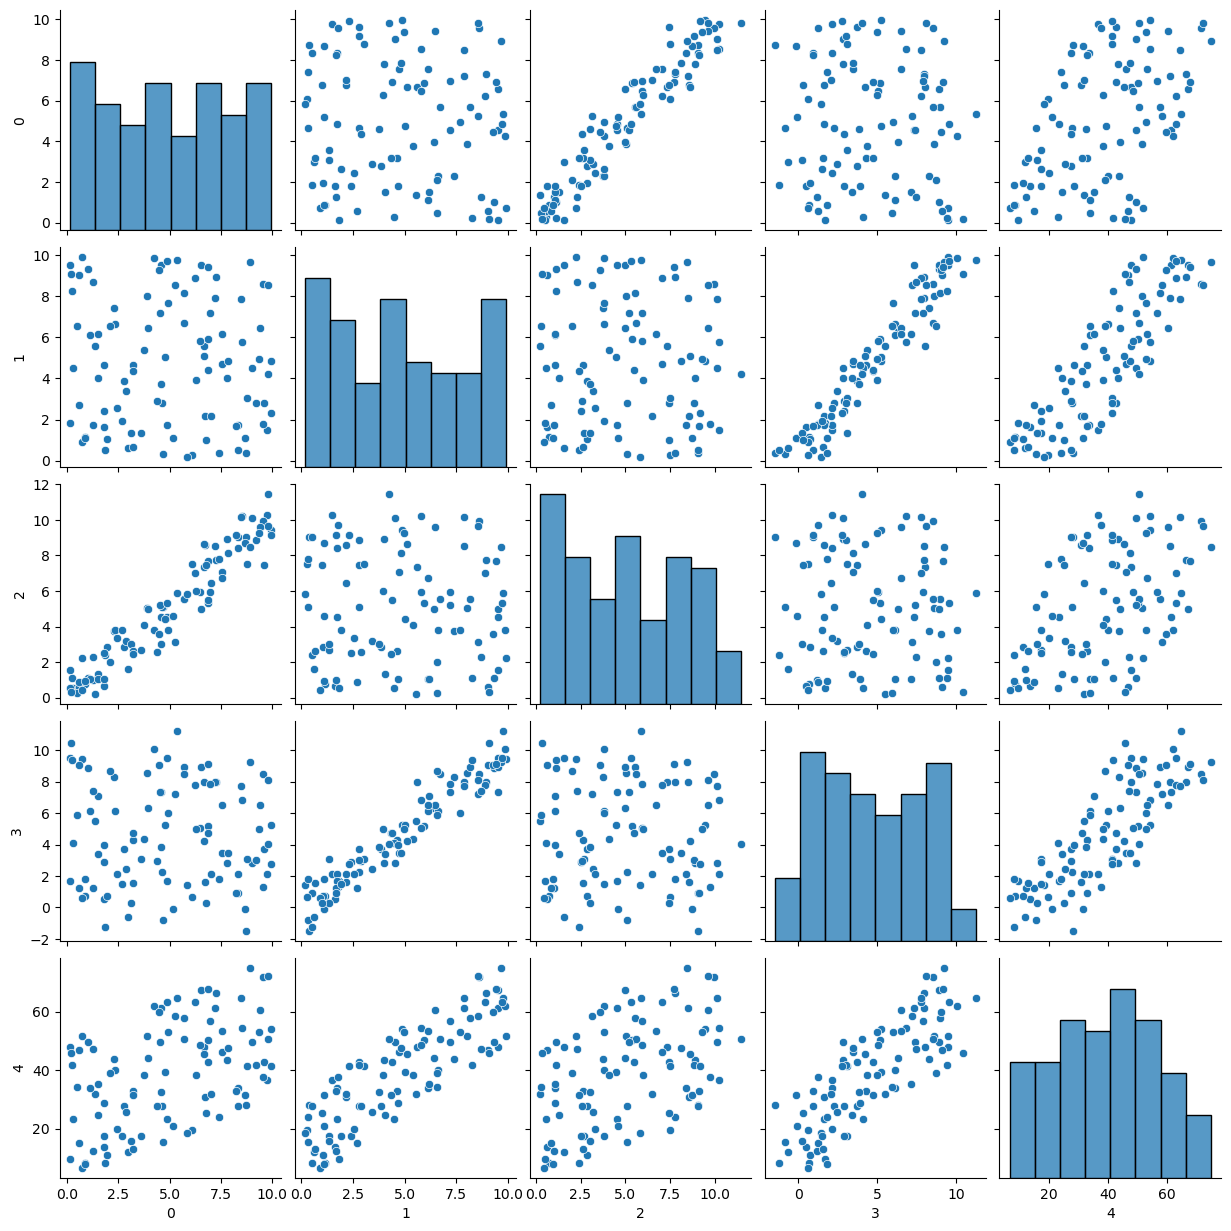

In [8]:
#UTILITY FUNCTION: 
def explore_data(x,y,iplot=True):

    #PRINT SHAPE
    print(x.shape)
    print(y.shape)

    #COMPUTE MERIT 
    print("merit =",merit(x,y,correlation="spearman")); 
    print("merit =",merit(x,y,correlation="pearson"))

    #PLOT
    if (iplot):
        sns.pairplot(pd.DataFrame(np.hstack((x,y.reshape(y.shape[0],1)))))
        plt.show()

# TEST YOUR CODE ABOVE
explore_data(x,y)

#### Aside: Combinatorics 

If the feature set is small then we can iterator over all possible combinations of feature subsets 

However,for large data-sets this becomes impractical.

This can be iteration can be done with the following python code


In [9]:
#modified from: https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
import itertools
list1 = [*range(1,4+1)]; #print(list1)
for L in range(1,len(list1) + 1):
    for subset in itertools.combinations(list1, L):
        print(list(subset))

# EXPECTED 
#x1
#x2
#x3
#x4
#x1,x2 
#x1,x3 
#x1,x4 
#x2,x3 
#x2,x4
#x3,x4
#x1,x2,x3
#x1,x2,x4
#x1,x3,x4
#x1,x2,x3,x4

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


### ASSIGNMENT-2: 

* Given two matrices `x` and `y`, write a function that;
  
  * Iterates over all possible subsets combinations of the x features 

  * Computes the figure of merit for the subset

  * Keeps track of the maximum Merit and returns the optimal subset at the end

In [10]:
def maximize_CFS(x,y):
     
     # INSERT CODE HERE  
     df_x = pd.DataFrame(x)
     df_y = pd.DataFrame(y)
     merit = -100000
     subset = []

     list1 = [*range(0,df_x.shape[1])]; #print(list1)
     for L in range(1,len(list1) + 1):
          for subset in itertools.combinations(list1, L):
               df_subset = df_x.iloc[:,list(subset)]
               df = pd.concat([df_subset,df_y],axis=1)

               correl = df.corr(method="pearson")
               upper_triangle = correl.values * np.triu(np.ones(correl.shape), k=1)

               rxx = upper_triangle[:,0:df_subset.shape[1]]
               rxy = upper_triangle[:,df_subset.shape[1]]

               m_rxx = rxx[rxx != 0].mean()
               m_rxy = rxy[rxy != 0].mean()

               k = df_x.shape[1]
               merit_new = k*np.absolute(m_rxy)/(np.sqrt(k+k*(k+1)*np.absolute(m_rxx)))

               if merit_new > merit:
                    merit = merit_new
                    set = list(subset)
                    new_subset = df_subset
                    print(f"found new max: {merit}  optimal features = {set}")
               else:
                    pass
               
     return new_subset.values

In [11]:
# RUN SEARCH
x_opt=maximize_CFS(x,y)

found new max: 1.1818306797627047  optimal features = [0, 1]
found new max: 1.2357386760846492  optimal features = [1, 2]


C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_21880\3799309579.py:21: RuntimeWarning: Mean of empty slice.
  m_rxx = rxx[rxx != 0].mean()
c:\Users\JaeHoBahng\anaconda3\envs\DSAN5000\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(100, 2)
(100, 1)
merit = 0.9047582209676336
merit = 0.8980017968174456


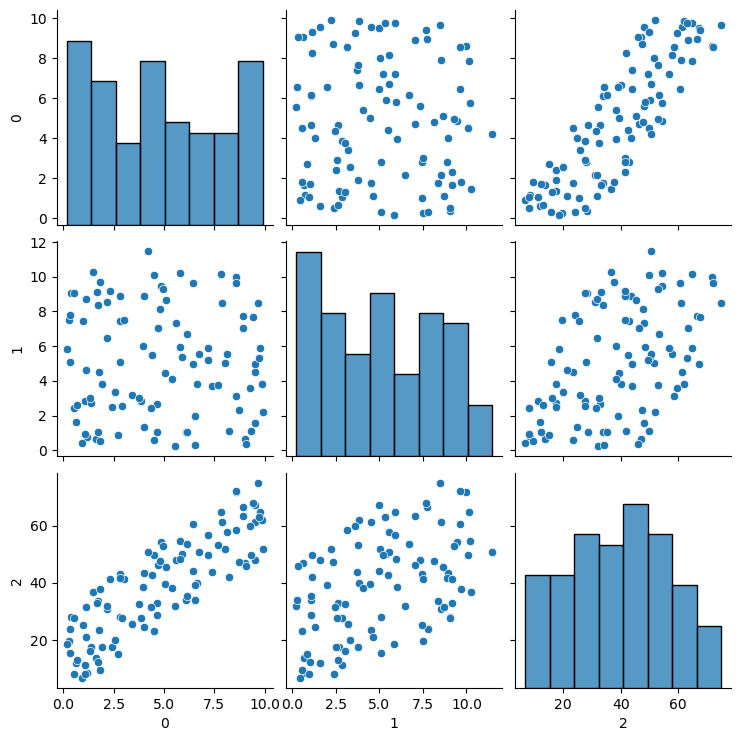

In [12]:
# EXPLORE OPTIMAL FEATURE SET 
explore_data(x_opt,y) 

# MNIST

## ASSIGNMENT-3:

Write a training function that 

* given `x_train, y_train, x_test, y_test` does the following
* Trains a Gaussian Naive Bayes classifier on the training data
* Computes and prints the accuracy for both training and test set 

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import random


In [14]:

def train_GNB_model(x_train,y_train,x_test,y_test,i_print=False):
    # INSERT CODE HERE  
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    return accuracy_train,accuracy_test

#### Classification-2: MNIST Variance Threshold selection 

Run the following code to test the code you write above 

In [15]:
# DIGITS
from sklearn import datasets
(x,y)=datasets.load_digits(n_class=10, return_X_y=True, as_frame=False)

LABEL= 4


<Figure size 640x480 with 0 Axes>

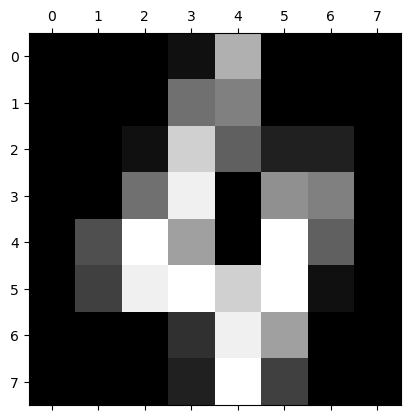

In [16]:
# PLOT ONE OF THE HAND-WRITTEN DIGITS 
import matplotlib.pyplot as plt
print("LABEL=",y[4])
plt.gray()
plt.matshow(x[4].reshape(8,8))
plt.show()

In [17]:
# SET INDICES FOR TRAIN/TEST SET
N=x.shape[0]          # number of rows
l = [*range(N)]       # indices
cut = int(0.7 * N)    # 80% of the list
random.shuffle(l)     # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:]  # last 20% of shuffled list

In [18]:
# COMPUTE UPPER AND LOWER LIMIT FOR VARIANCE ACCROSS SAMPLES
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0
42.72106450836808


In [19]:
# VARIANCE THRESHOLD SEARCH

from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

# DOESN"T WORK WELL WITH EDGE VALUES (ZERO VAR)
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
num_features=[]
train_accuracies=[]
test_accuracies=[]

#FULL TRAINING SET
x_train=x[train_index]; y_train=y[train_index]
x_test=x[test_index]; y_test=y[test_index]
(acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=True)
num_features.append(x_train.shape[1])
train_accuracies.append(acc_train)
test_accuracies.append(acc_test)

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print(THRESHOLD, xtmp.shape[1])

    x_train=xtmp[train_index]; y_train=y[train_index]
    x_test=xtmp[test_index]; y_test=y[test_index]

    (acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)



1.4731401554609682 47
2.9462803109219364 47
4.419420466382904 45
5.892560621843873 45
7.365700777304841 45
8.838840932765809 45
10.311981088226778 42
11.785121243687746 40
13.258261399148713 36
14.731401554609683 35
16.20454171007065 34
17.677681865531618 33
19.150822020992585 29
20.623962176453556 29
22.097102331914524 29
23.57024248737549 27
25.04338264283646 25
26.516522798297427 24
27.989662953758398 23
29.462803109219365 21
30.935943264680333 21
32.4090834201413 18
33.88222357560227 16
35.355363731063235 11
36.8285038865242 9
38.30164404198517 7
39.774784197446145 3


## ASSIGNMENT-4: 

Describe in 100 to 200 words what the code in the previous cell is doing 

INSERT TEXT HERE

In summary, the code above is calculating the accuracy of the training set and test set data with different variance thresholds. First, the code makes an interval of variances that we will apply to our VarianceThreshold function from the minimum variance to the maximum variance with intervals to make 30 thresholds and takes out the first and last variance to take out the edges. Then, it trains the model with the entire dataset with no thresholds and adds it to the list of features, train/test accuracies. After that, with a for loop on the set of thresholds that we made, the code trains the model for each given threshold which means that it will be training the model with less features as the threshold becomes higher. Each test/train accuracy and number of features for the different thresholds is added to the list, and finally in the plot below, it gives us a visualization of the training accuracy and test accuracy for each number of features we use. 

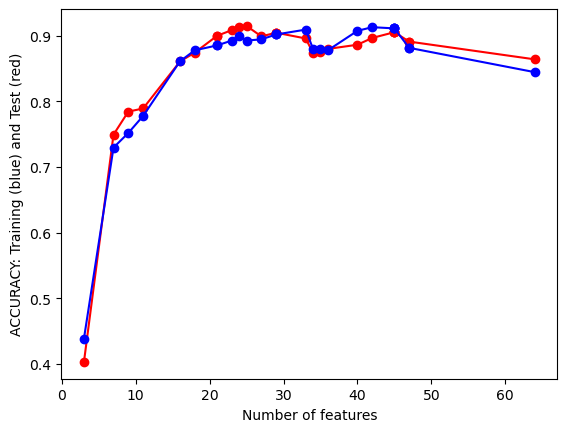

In [20]:
#PLOT-1
plt.plot(num_features,train_accuracies,'-or')
plt.plot(num_features,test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()